<a href="https://colab.research.google.com/github/akashkivani/almabetter-pythonEDA-project/blob/main/EDA_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data, for the shake of privacy.

I strated the analysis with with checking how many null rows I have in data, as book-keeping errors and missing values gives poor result in analysis. After taking care of null values, I dropped the duplicated.

I made a number of graph to understand:
1. Hotel type that have max booking. 
2. % of booking cancellation. 
3. ADR wrt to booking channels. 
4. Stay of guests. 
5. Preferred room type of guests. 
6. segement with higher cancellation rate. 
7. Meal preferred by guests. 
8. Car parking space requirement. 
9. Months with higher booking. 

All the above graphs ultimately helped us to understand what kind of customers come to hotel, resource that are required on regular basis, etc.

After all the detailed analysis, I have also made a corelation chart of different columns/feature.


# **GitHub Link -**

https://github.com/akashkivani/almabetter-pythonEDA-project/blob/main/EDA_Submission.ipynb

# **Problem Statement**


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.

#### **Define Your Business Objective?**

Objective: To analysize and visualize different aspects (features) of hotel buisness and extract useful informations out for buisness needs. To identify which channels lead to higher booking, which hotel types and food types have higher preference, etc. and thus make useful decision out of it. 

The historical ternd record of hotel booking is useful for buisness in many many ways. For eg. 
1. By analyzing which hiotels have better booking, we can invest in better advertisement for other hotel types. We also can keep the hotel type with higher booking guest ready. 
2. By knowing which food type is more preferred, we can keep those types available at all time and tune the operations , etc.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive/')

hotel_data = pd.read_csv('/content/drive/MyDrive/Data Science/AlmaBetter School/Capstone/Project 1/Data/Hotel Bookings.csv')

Mounted at /content/drive/


### Dataset First View

In [3]:
# Dataset First Look

pd.set_option('display.max_columns', None)
hotel_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

hotel_data.shape

(119390, 32)

### Dataset Information

In [5]:
# Dataset Info

hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

hotel_data.duplicated().value_counts()

False    87396
True     31994
dtype: int64

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

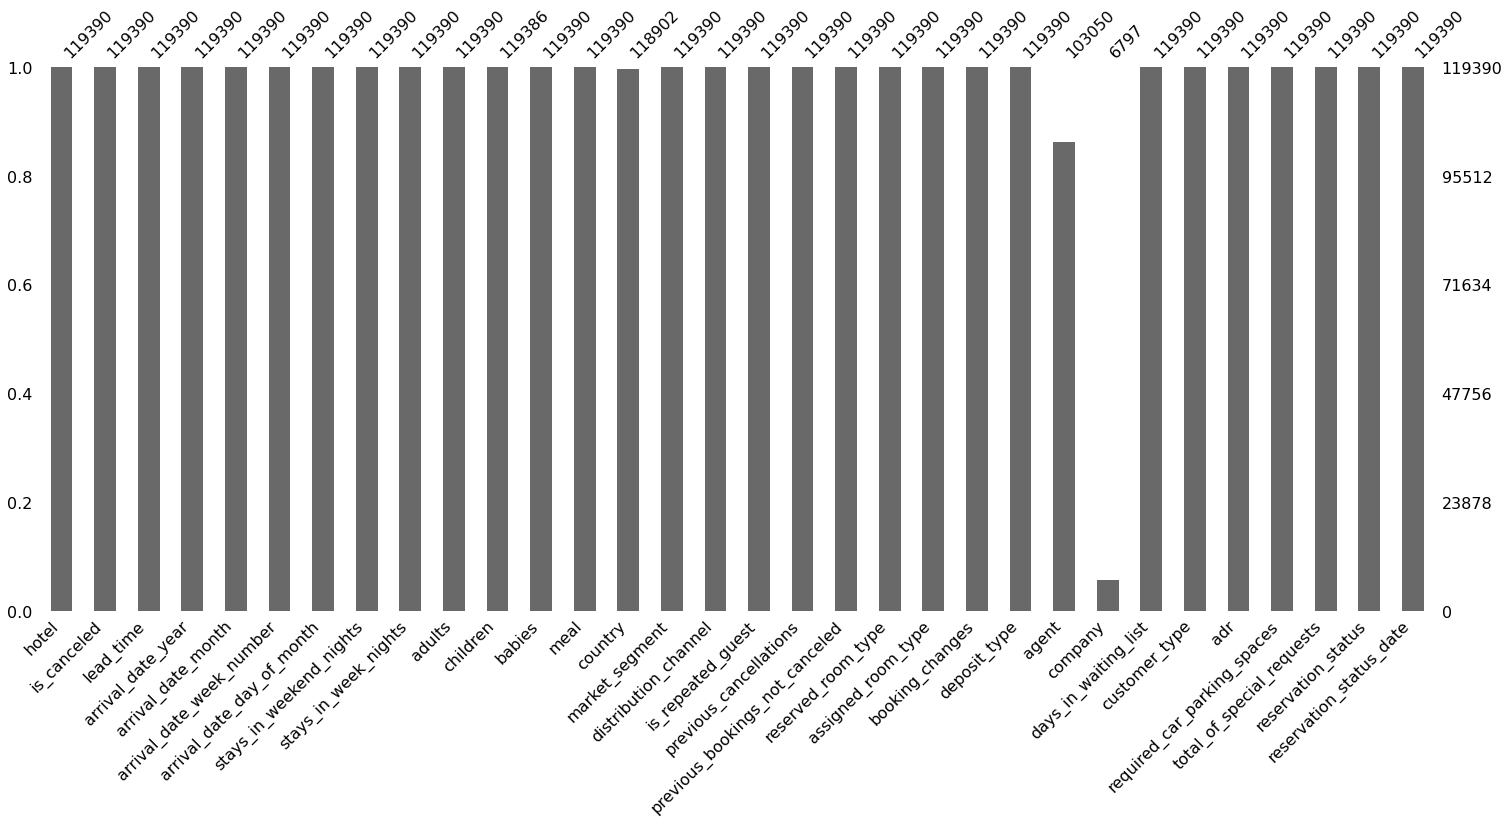

In [8]:
# Visualizing the missing values

plt.figure(figsize = (10,15))
msno.bar(hotel_data)

### What did you know about your dataset?

1. The data have multiple dtypes including int, float, object. 
2. The data have 31994 duplicates. 
3. The data have null in 3 of the features.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# Dataset Describe
hotel_data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

### Variables Description 

hotel : Resort Hotel / City Hotel

is_canceled:if the booking was canceled- 1 / not - 0

lead_time : No of days between the entering date of the booking into the PMS and the arrival date

arrival_date_year : Year of arrival date

arrival_date_month : Month of arrival date

arrival_date_week_number : Week no of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : No of weekend nigh

stays_in_weekend_nights : No of weekend nights (Saturday / Sunday) the guest stayed / booked to stay at the hotel

stays_in_week_nights : No of week nights (Monday to Friday) the guest stayed / booked to stay at the hotel

adults : No of adults

children : No of children

babies : No of babies

meal : Type of meal booked.

country : Country of origin. market_segment : Market segment designation. In categories, “TA” - “Travel Agents” and “TO” - “Tour Operators”

distribution_channel : Booking distribution channel. “TA” - “Travel Agents” and “TO” - “Tour Operators”

is_repeated_guest : tells whether the booking name was repeated guest -1 / not- 0

previous_cancellations : No of previous bookings that were cancelled by customer prior to the current booking

previous_bookings_not_canceled : No of previous bookings not cancelled by customer prior to the current booking

reserved_room_type : Code of room type reserved.

assigned_room_type : Code for the type of room assigned.

booking_changes : No of changes made between booking till moment of check-in or cancellation

deposit_type: Tells customer made a deposit to guarantee the booking.

agent : ID of the travel agency that made the booking company : ID of the company that made the booking

days_in_waiting_list : No of days the booking was in the waiting list before it got confirmed to customer

customer_type : Type of customer

adr : Average Daily Rate = sum of all lodging transactions/total number of staying nights

required_car_parking_spaces : No of car parking spaces required

total_of_special_requests : No of special requests made by customer reservation_status : Reservation last status, assuming the below categories

Canceled – customer canceled the booking

Check-Out – customer has checked in and departed also

No-Show – customer did not check-in and did inform the hotel as well

reservation_status_date : Date at which the last status was set. Can be combined with Reservation Status to get booking canceled or customer checked-out

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

for i in hotel_data.columns.tolist():
  print("No. of unique values in ",i,"is",hotel_data[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### Data Wrangling Code

source: Internet.

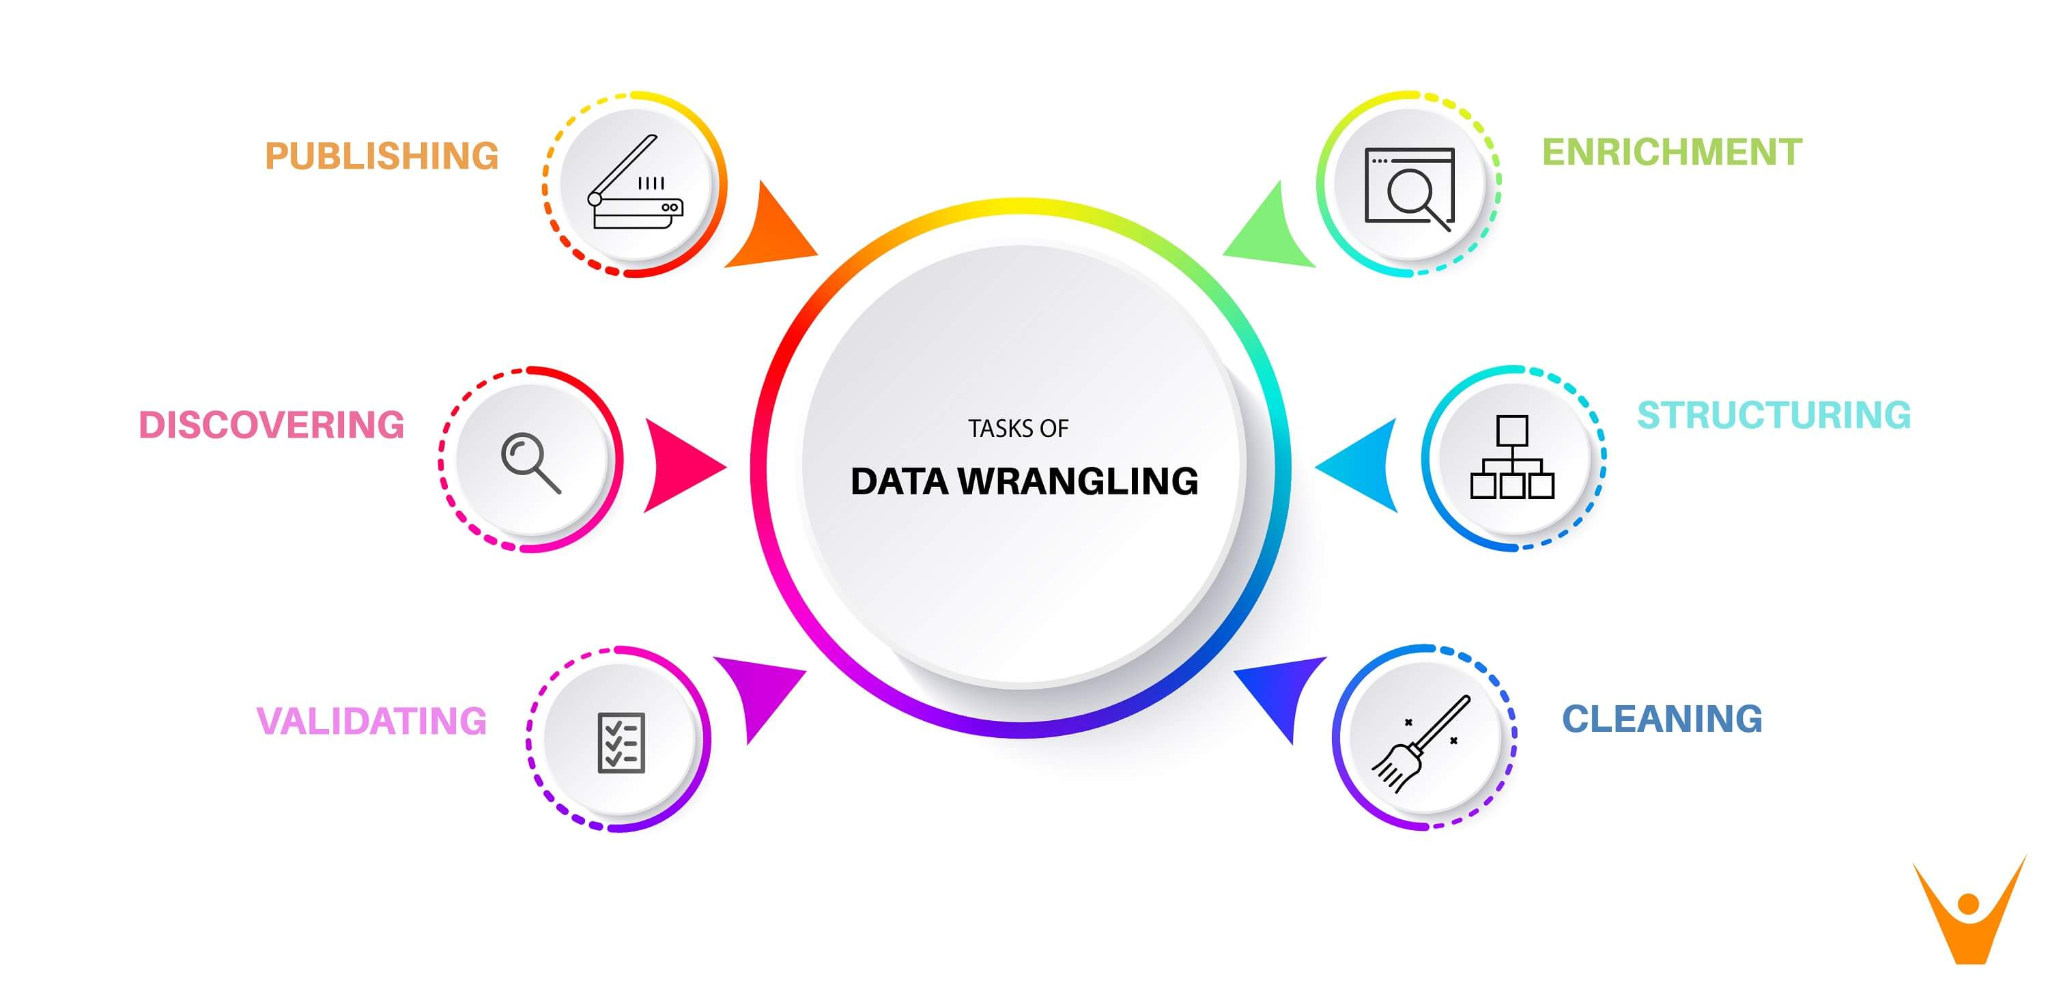

In [12]:
# Write your code to make your dataset analysis ready.

hotel_data['total stay'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights'] #adding a new column in df.

In [31]:
#creating additional data frame which have data of uncancelled bookings. It will be later used while we will visualize and analyse booking trend by month, etc. 
df_uncancelled = hotel_data[hotel_data['is_canceled'] == 0] 

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**a. At first finding out what specific kind of hotel have high booking.**

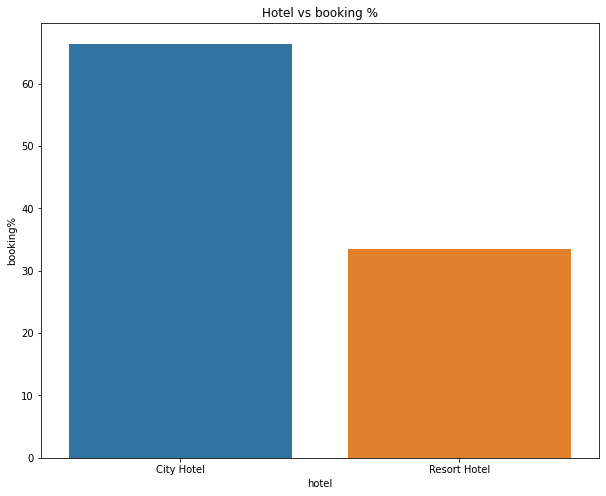

In [13]:
# Chart - 1 visualization code

group_by_hotel = hotel_data.groupby('hotel')
df1 = pd.DataFrame((group_by_hotel.size()/hotel_data.shape[0])*100)
df2= df1.reset_index().rename(columns = {0:'booking%'})

#Setting size, title and plotting. 
plt.figure(figsize = (10,8)) #set figure size
plt.title('Hotel vs booking %') #set title
sns.barplot(x = df2['hotel'] , y = df2['booking%']) 

##### 1. Why did you pick the specific chart?

Here, I am looking into which kind of hotel have higher number of guests, thus a barplot is most suitable for it.

##### 2. What is/are the insight(s) found from the chart?

Acc. to the graph, city hotel gets higher booking %.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As city hotel have higher number of guests coming in, it is important for management to invest in acquiring more number of hotels in cities, keeping city hotels ready for guests at all time and boost ads when required. 

If, management fails to keep hotels guest ready then it can lead to negative growth.

#### Chart - 2

In [14]:
# Chart - 2 visualization code

In [15]:
hotel_data['is_canceled'].value_counts() #to check value count of 0 and 1(not cancel and cancel respectively )

0    75166
1    44224
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Cancellation vs non_cancellation')

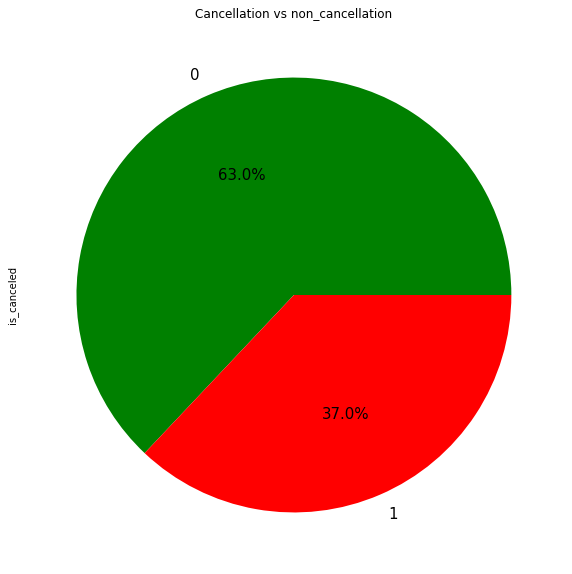

In [16]:
hotel_data['is_canceled'].value_counts().plot.pie(colors = ['green' , 'red'], autopct='%1.1f%%' , figsize = (15,10), fontsize = 15) #plotting a pie plot.
plt.title('Cancellation vs non_cancellation')

##### 1. Why did you pick the specific chart?

A pie chart is good tool to visualize the distribution of discreate variables. Anyone from any different domain can see the chart and easily understand it.

##### 2. What is/are the insight(s) found from the chart?

27.5% of all bookings where cancelled, i.e. more than one-fourth.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will be useful for the management to look into reasons some guests are cancelling reservations. In case it's because of bad review, etc. management needs to act on it, otherwise it can potentially lead to negative growth. 

#### Chart - 3

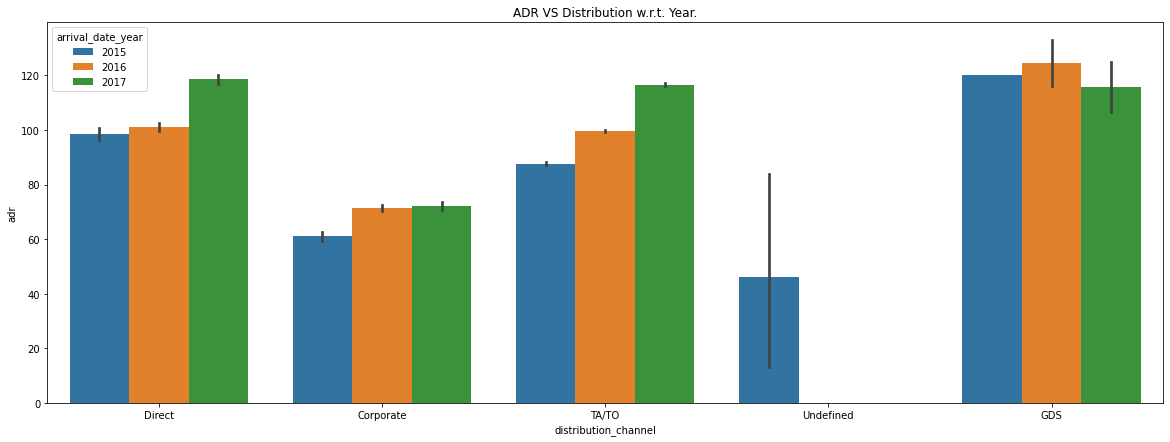

In [17]:
# Chart - 3 visualization code

plt.figure(figsize = (20,7))
plt.title('ADR VS Distribution w.r.t. Year.')
sns.barplot(data = hotel_data , x = 'distribution_channel' , y = 'adr' , hue = 'arrival_date_year')

##### 1. Why did you pick the specific chart?

As I need to compare here the adr from different streams, bar plot is much more useful than others, like lineplot, piechart, etc. 

##### 2. What is/are the insight(s) found from the chart?

Max adr comes from GDS while min comes from corporate.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Pumping better resources into GDS can lead to positive buisness growth. The management can do random checks about micro reasons for other streams not performing well. In case it's because of internal mismanagement in stream, solving it will lead to positive growth.

#### Chart - 4

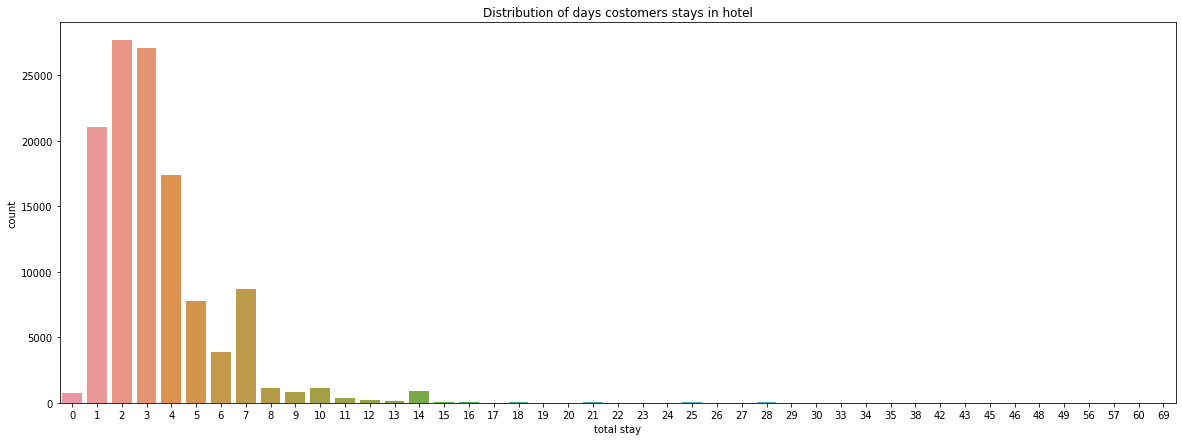

In [18]:
# Chart - 4 visualization code

plt.figure(figsize = (20,7))
plt.title('Distribution of days costomers stays in hotel')
sns.countplot( x = hotel_data['total stay'])

##### 1. Why did you pick the specific chart?

As I need to do a distribution plot for discreate data, countplot in seborn is the best option.

##### 2. What is/are the insight(s) found from the chart?

Most customers stay in hotel for 1 to 4, There are hardly some customer who stays for more that 12 days. None stayed for more than 28 days according to past collected data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NA here.

#### Chart - 5

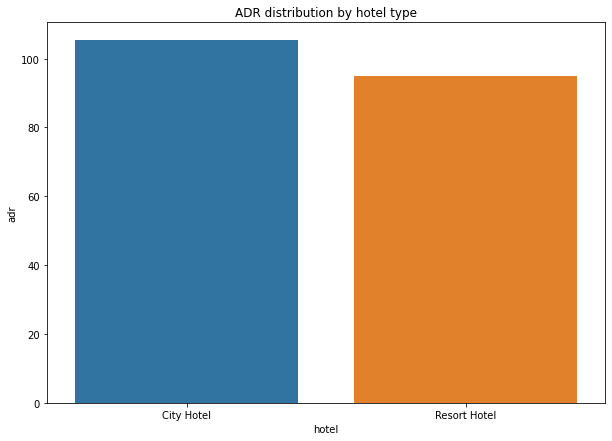

In [19]:
# Chart - 5 visualization code
# ADR between types of hotel.

group_by_hotel = hotel_data.groupby('hotel') #grouping by
Mean_adr = group_by_hotel['adr'].mean().reset_index() 

plt.figure(figsize = (10,7))

plt.xlabel('hotel')
plt.ylabel('adr')
plt.title('ADR distribution by hotel type')

sns.barplot(x= Mean_adr['hotel'] , y = Mean_adr['adr'])

##### 1. Why did you pick the specific chart?

For comparision, Barplot is a easy to understand option.

##### 2. What is/are the insight(s) found from the chart?

Acc. to the graph, city adr is generating more adr on average, thus points towards better revenue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As city hotel is generating higher on average adr, investing to open more city hotel can potentially lead to positive buisness growth. 

In case, company invests high amount in resort hotels in hopes for better adr, it will potentially lead to negative buisness growth.

#### Chart - 6

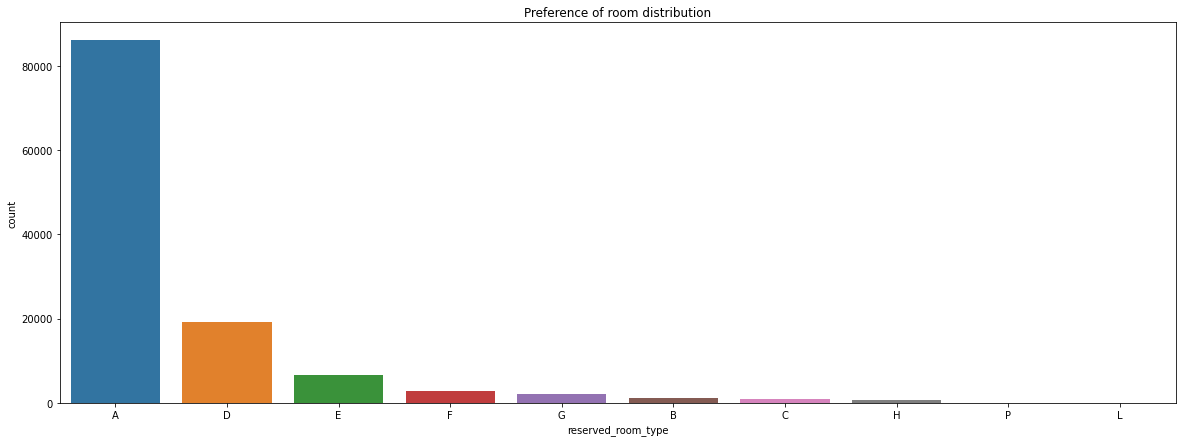

In [20]:
# Chart - 6 visualization code
# Customer preference by room type.

plt.figure(figsize = (20,7))
plt.xlabel('Room Type')
plt.ylabel('Frequency of Room booked by costumer')
plt.title("Preference of room distribution")
sns.countplot(x = hotel_data['reserved_room_type'] , order= hotel_data['reserved_room_type'].value_counts().index) #Plotting a count plot of reserved room type. 

##### 1. Why did you pick the specific chart?

As we are comparing discreate values here, to compare which room types have high demand, count plot is a better option. It will count demand of each room type and plot a bar chat to represent it.

##### 2. What is/are the insight(s) found from the chart?

Costumers are booking room type 'A' in very high number(at around 5k +), followed by D, E, F, G,B,C,H, type. According to previous data, no one prefers L and P type room.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As most guests prefer A, the hotel management can consider changing hotel room type L, P into A as L,P types room have no demand according current historical trend. By investing in converting room, hotel can expect a positive buisness growth. As per as previous chart, there are a number of cancellation as well in booking, in case some guests are cancelling the booking because of unavailability of favourite room type, it can stop. 

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Distribution of Market segement that are cancelling hotel reservation.

In [21]:
Cancelled_df = hotel_data[hotel_data['is_canceled'] == 1] #Making a df where cancellation is done. 
Cancelled_df.head()

hotel  is_canceled  lead_time  arrival_date_year  \
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
27  Resort Hotel            1         60               2015   
32  Resort Hotel            1         96               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
27               July                        27                          1   
32               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
8                         0                     3       2       0.0       0   
9                         0                     3       2       0.0       0   
10                        0                     4       2       0.0       0   
27                        2                     5       2       0.0       0   
32                        2                     8       2       0.0       0   

   meal country market_segment distribution_channel  is_repeated_guest  \
8    BB     PRT      Online TA                TA/TO                  0   
9    HB     PRT  Offline TA/TO                TA/TO                  0   
10   BB     PRT      Online TA                TA/TO                  0   
27   BB     PRT      Online TA                TA/TO                  0   
32   BB     PRT         Direct               Direct                  0   

    previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
8                        0                               0                  A   
9                        0                               0                  D   
10                       0                               0                  E   
27                       0                               0                  E   
32                       0                               0                  E   

   assigned_room_type  booking_changes deposit_type  agent  company  \
8                   A                0   No Deposit  240.0      NaN   
9                   D                0   No Deposit   15.0      NaN   
10                  E                0   No Deposit  240.0      NaN   
27                  E                0   No Deposit  240.0      NaN   
32                  E                0   No Deposit    NaN      NaN   

    days_in_waiting_list customer_type    adr  required_car_parking_spaces  \
8                      0     Transient   82.0                            0   
9                      0     Transient  105.5                            0   
10                     0     Transient  123.0                            0   
27                     0     Transient  107.0                            0   
32                     0     Transient  108.3                            0   

    total_of_special_requests reservation_status reservation_status_date  \
8                           1           Canceled              2015-05-06   
9                           0           Canceled              2015-04-22   
10                          0           Canceled              2015-06-23   
27                          2           Canceled              2015-05-11   
32                          2           Canceled              2015-05-29   

    total stay  
8            3  
9            3  
10           4  
27           7  
32          10

In [22]:
Cancelled_df = Cancelled_df.groupby(['market_segment' , 'hotel']).size().reset_index().rename(columns={0:'counts'}) #grouping them for better analysis.
Cancelled_df

market_segment         hotel  counts
0        Aviation    City Hotel      52
1   Complementary    City Hotel      64
2   Complementary  Resort Hotel      33
3       Corporate    City Hotel     641
4       Corporate  Resort Hotel     351
5          Direct    City Hotel    1056
6          Direct  Resort Hotel     878
7          Groups    City Hotel    9623
8          Groups  Resort Hotel    2474
9   Offline TA/TO    City Hotel    7173
10  Offline TA/TO  Resort Hotel    1138
11      Online TA    City Hotel   14491
12      Online TA  Resort Hotel    6248
13      Undefined    City Hotel       2

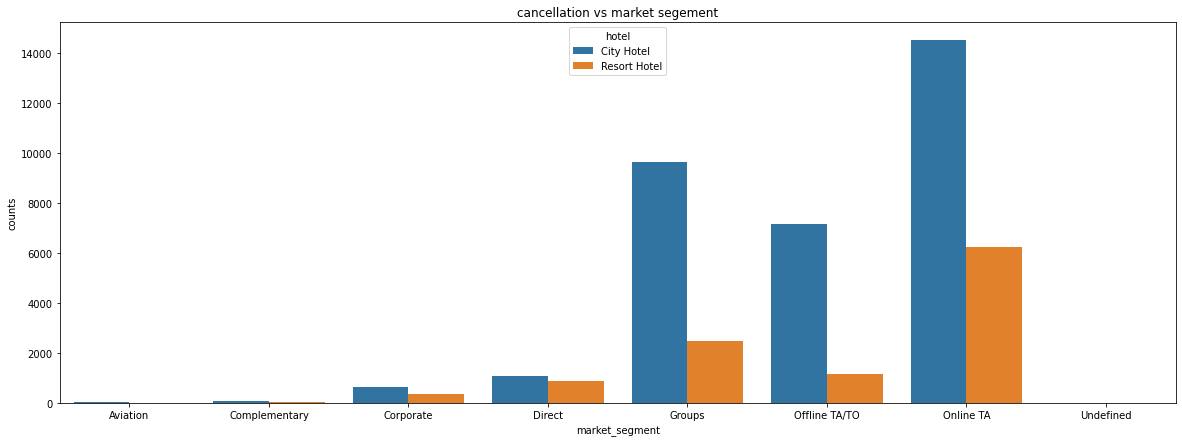

In [23]:
plt.figure(figsize=(20,7))
plt.title('cancellation vs market segement')
plt.ylabel('number of cancellation')
sns.barplot( x = 'market_segment' , y = 'counts' , hue= 'hotel' , data = Cancelled_df)

##### 1. Why did you pick the specific chart?

Here, in this graph, we are comparing the cancellation by different channel as well as in different hotel type. Thus, a barplot is easier to visualize here as it represents all of them side by side.

##### 2. What is/are the insight(s) found from the chart?

Online TA have highest cancellation rate, in city hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A online TA/TO have highest cancellation rate, the management should invest to understand the reason for it. Understanding and handling such cancellation will lead to positive buisness growth.

#### Chart - 8

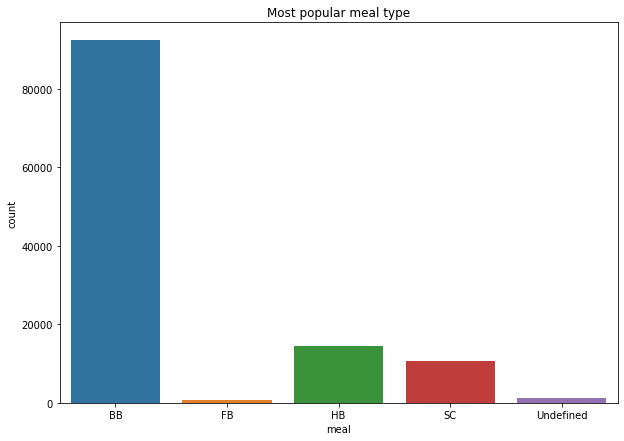

In [24]:
# Chart - 8 visualization code
# Which meal type is most preferred.

plt.figure(figsize = (10,7))
plt.title('Most popular meal type')

sns.countplot(x = hotel_data['meal'])

##### 1. Why did you pick the specific chart?

Countplot groups, groups and plots a barplot. Here, we need to visualize the variation of demand by foodtype, count plot is the best option. 

##### 2. What is/are the insight(s) found from the chart?

BB is the most popular meal type.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As BB have highest demand, the management can invest to ensure the availablity at all time and highest priority. It will lead to guest satisfication and can potentially increase repeat guests.

#### Chart - 9

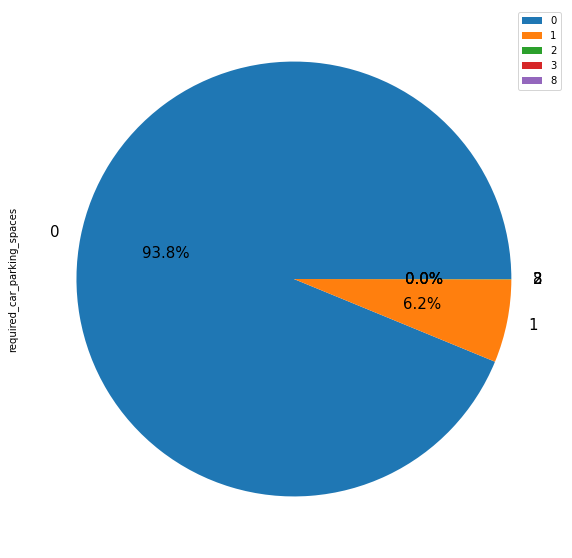

In [26]:
# Chart - 9 visualization code
# Car parking requirement of costumers.

hotel_data['required_car_parking_spaces'].value_counts().plot.pie(autopct='%1.1f%%' ,figsize = (15,10) , fontsize = 15)
plt.legend()

##### 1. Why did you pick the specific chart?

Here we want to visualize a relative(% wise) representation of data, about demand of parking space. Pie chart is easier to intrepret such requirement as it represents the data n circular(pie) form with parts distributed for each %.

##### 2. What is/are the insight(s) found from the chart?

Most guests do not need parking space, while just 8.3% needs 1 parking space. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As most guests do not need any parking space, the management can look into possibility of converting extra parking space into room type A, which can potentially lead to positive buisness growth. 


#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Monthly trend of booking.

In [27]:
import calendar

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


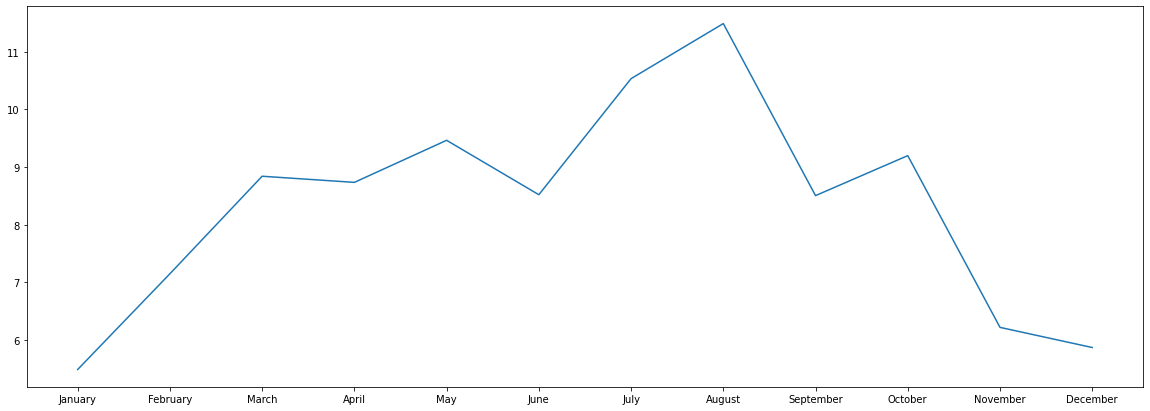

In [32]:
month_data=df_uncancelled['arrival_date_month'].value_counts().reindex(calendar.month_name[1:])
figures=plt.figure(figsize=(20,7))
x=month_data.index
y=month_data/month_data.sum()*100
sns.lineplot(x,y.values) #Making a lineplot. 

##### 1. Why did you pick the specific chart?

For trend visualization, line plot is the best option.

##### 2. What is/are the insight(s) found from the chart?

1.   The booking starts low, peaks and then drop again. 

2.   Highest booking is there in month of August. 

3.   In DEC. and January, booking are the lowest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. The management can look into reason of low demand in JAN and DEC.
2. Management can also offer addition discount in months with low demand. It can potentially lead to positive buisness growth. 
3. In months with low demand, the management can consider to invest in ads.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

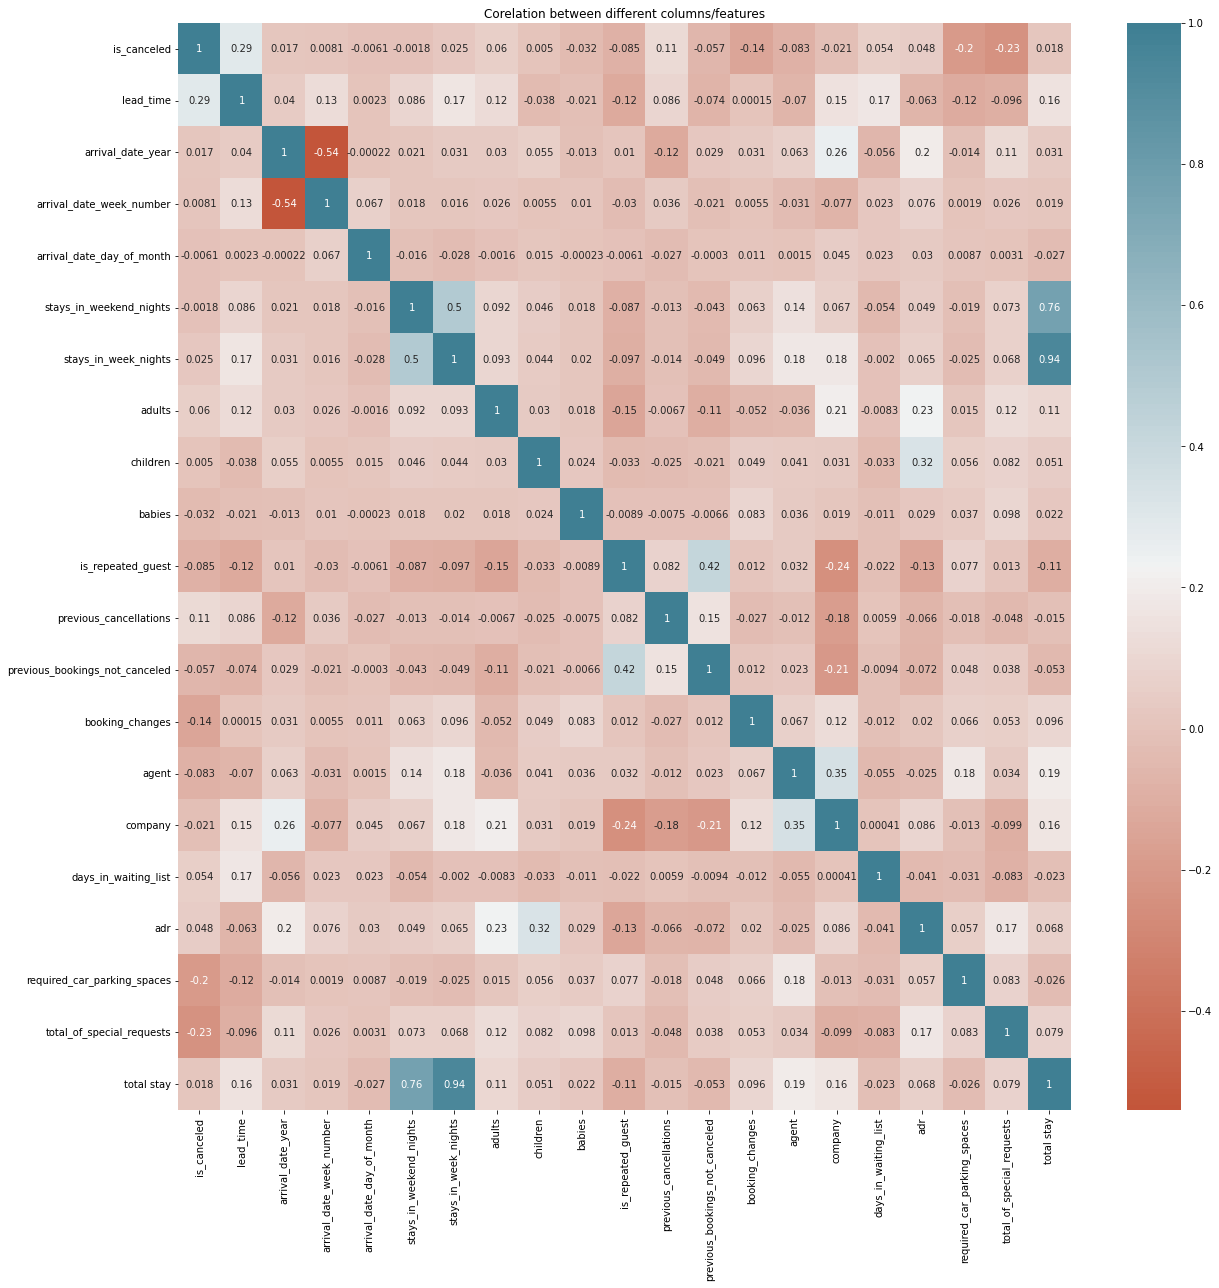

In [34]:
# Correlation Heatmap visualization code
plt.figure(figsize =(20,20))
plt.title('Corelation between different columns/features')
sns.heatmap(hotel_data.corr() , annot = True , cmap=sns.diverging_palette(20, 220, n=200)) #Making a heatmap for coorelation by .corr() function. 

##### 1. Why did you pick the specific chart?

Heatplots are best to visualize the corelation between different columns. High corelation tends to be closer to 1, and lower are close to 0. -ve means they are negatively corelated, that means when one increase, other decrease.

##### 2. What is/are the insight(s) found from the chart?

1. Most column have low-corelation. 
2. Blocks with -vs are negatively corelated, for eg: previous booking cancelled and children , adults, adr, etc. It will mean that if one of them will increase, other will decrease. 
3. Blocks with +ve shows higher co-relation. Means both will increase and decrease together. 
4. For eg: children, adults & adr are positvely corelated. 
5. Previous booking not cancelled and repeated guests are corelated. 
6. Lead time and stay length also have corelation. 
7. Note that all above mentioned columns have only some co-relation. 

#### Chart - 15 - Pair Plot 

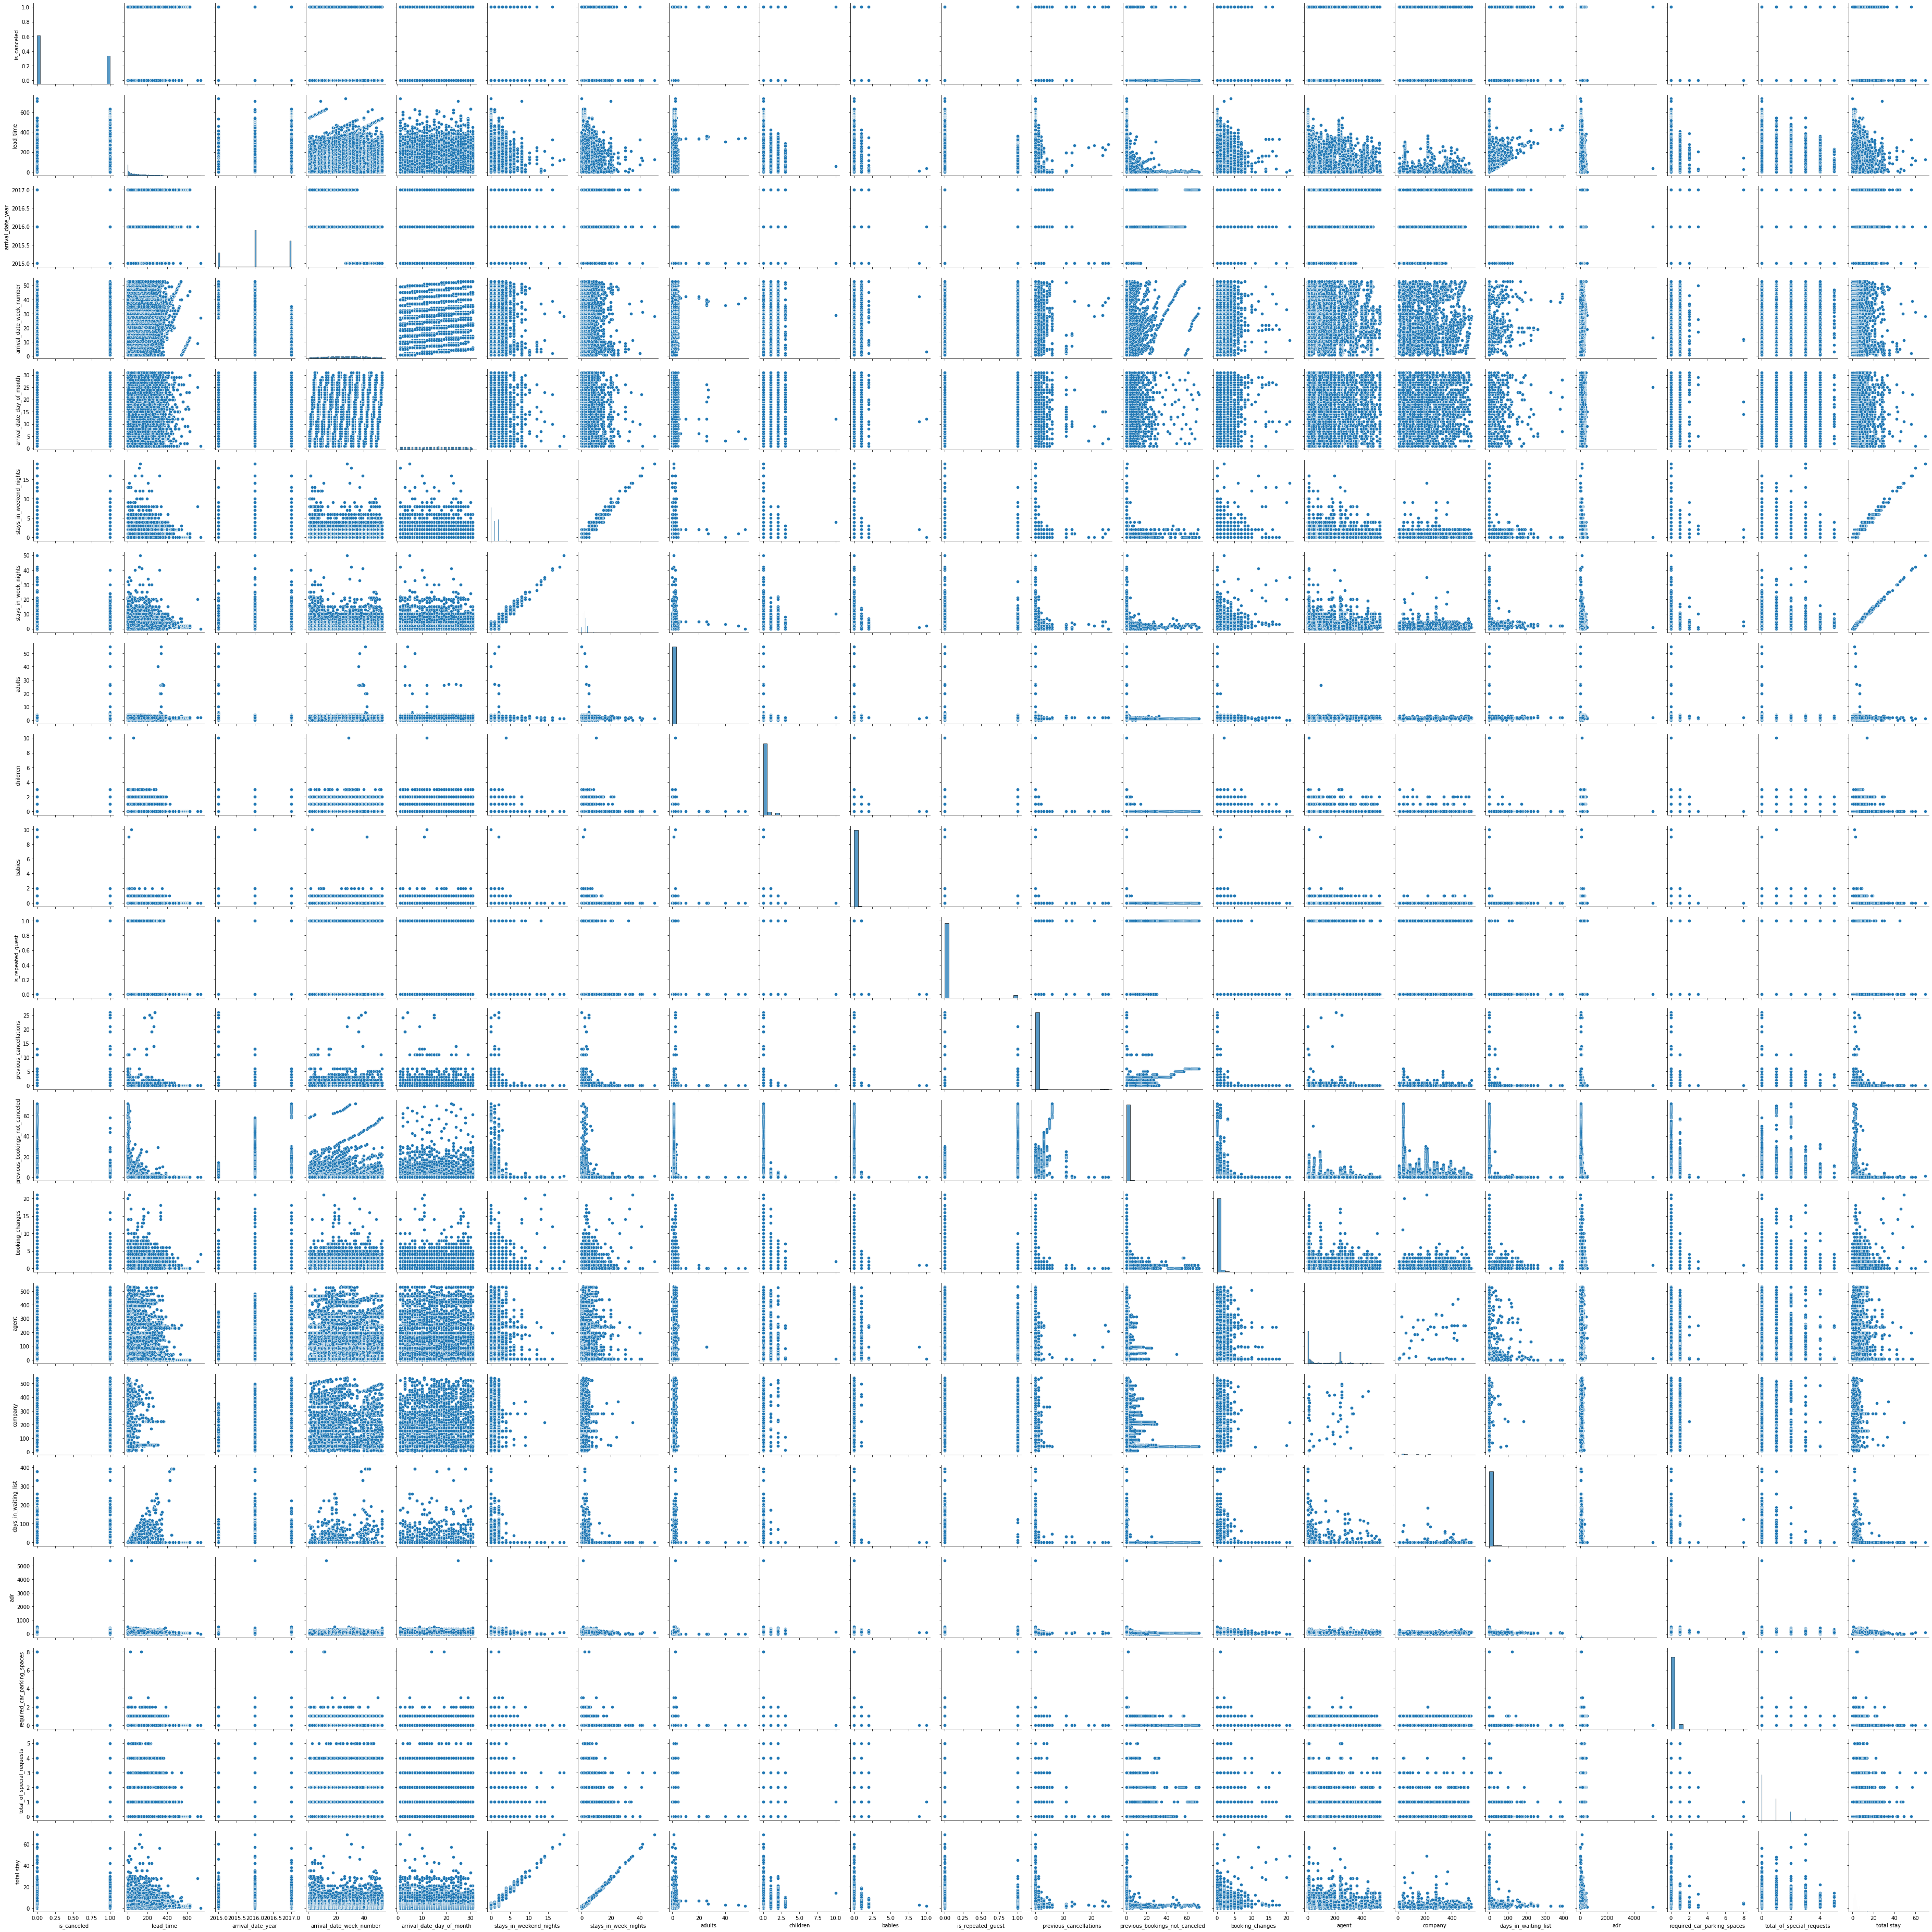

In [35]:
# Pair Plot visualization code
sns.pairplot(hotel_data)

##### 1. Why did you pick the specific chart?

Pair plot represents teh corelation of all features paired to one another. 
Pair plot is not good for data with high number of features as it's not easier to unbderstand for most people, henace neglecting it. Its most useful when the features are lower in number.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

1. Max guests come to city hotel.
Thus, the resort hotel need a little more work on marketing and attracting guests.
2. 27.5% of the guests cancel the booking.
The manegemnt is suggested to look into the reason for cancellation.
3. GDS gives highest ADR compared to other distribution channel, thus points towards higher revenue. The buisness can work in investing more in GDS to potentially increase the buisness. It can also consider looking into other streams.
4. Most guests stay at hotel for less than 7 days.
5. City hotel have higher adr, thus generating more revenue.
The management can consider acquring or opening more city hotels for positive buisness growth.
6. Room type A is most preferred by guests.
Thus, Room type A must be cleaned and repaired more frequently. Spare light bulbs, mosquito repellent, etc. should also be kept available acording room type A 's needs. 
7. BB is most preferred meal. Thus, it needs to be always available. Keeping guests happy with favourite meal can increase repeat guests as well as referrals.
8. TA/TO has highest cancellation rate. Thus the company needs to look into reasons of it and try to provide additional discounts to attract cancelled guests. 
9. 91.6% guests don't need parking space. The management can consider to convert extra parking space into rooms, if it is possible.
10. Max. Booking happens July to Mid-August. The management can consider investing in ads in months of lower demand as well as it can provide discount in case there are non - performing assects(rooms). 

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***